In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
crop_data = pd.read_csv("C:/Users/User/Desktop/PROJECTS/CROP RECOMMENDATION/Crop_recommendation.csv")
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
crop_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

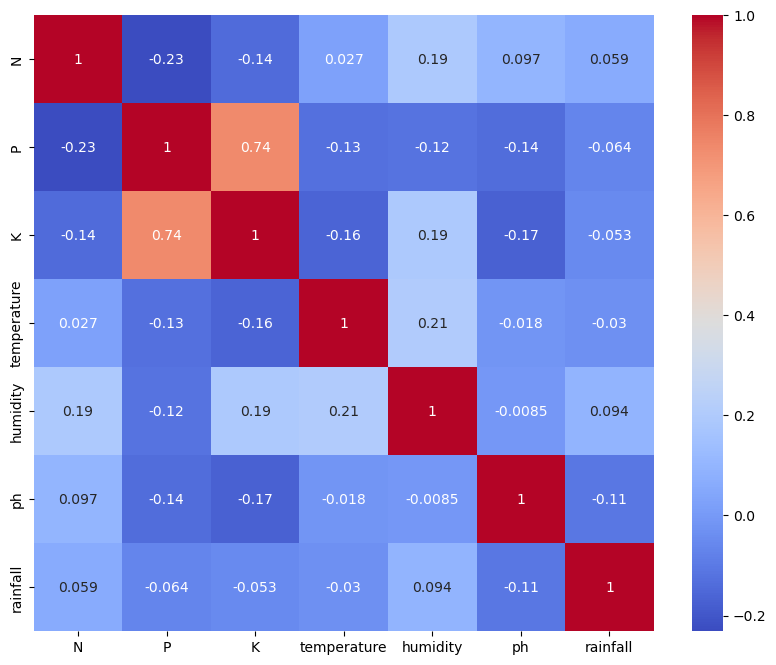

In [6]:
# Exclude the 'Crop_Type' column (or any other non-numeric columns) from the correlation matrix
numeric_data = crop_data.drop(['label'], axis=1)  # Replace 'Crop_Type' with the actual column name of the label if it's different

# Now calculate the correlation matrix and plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()


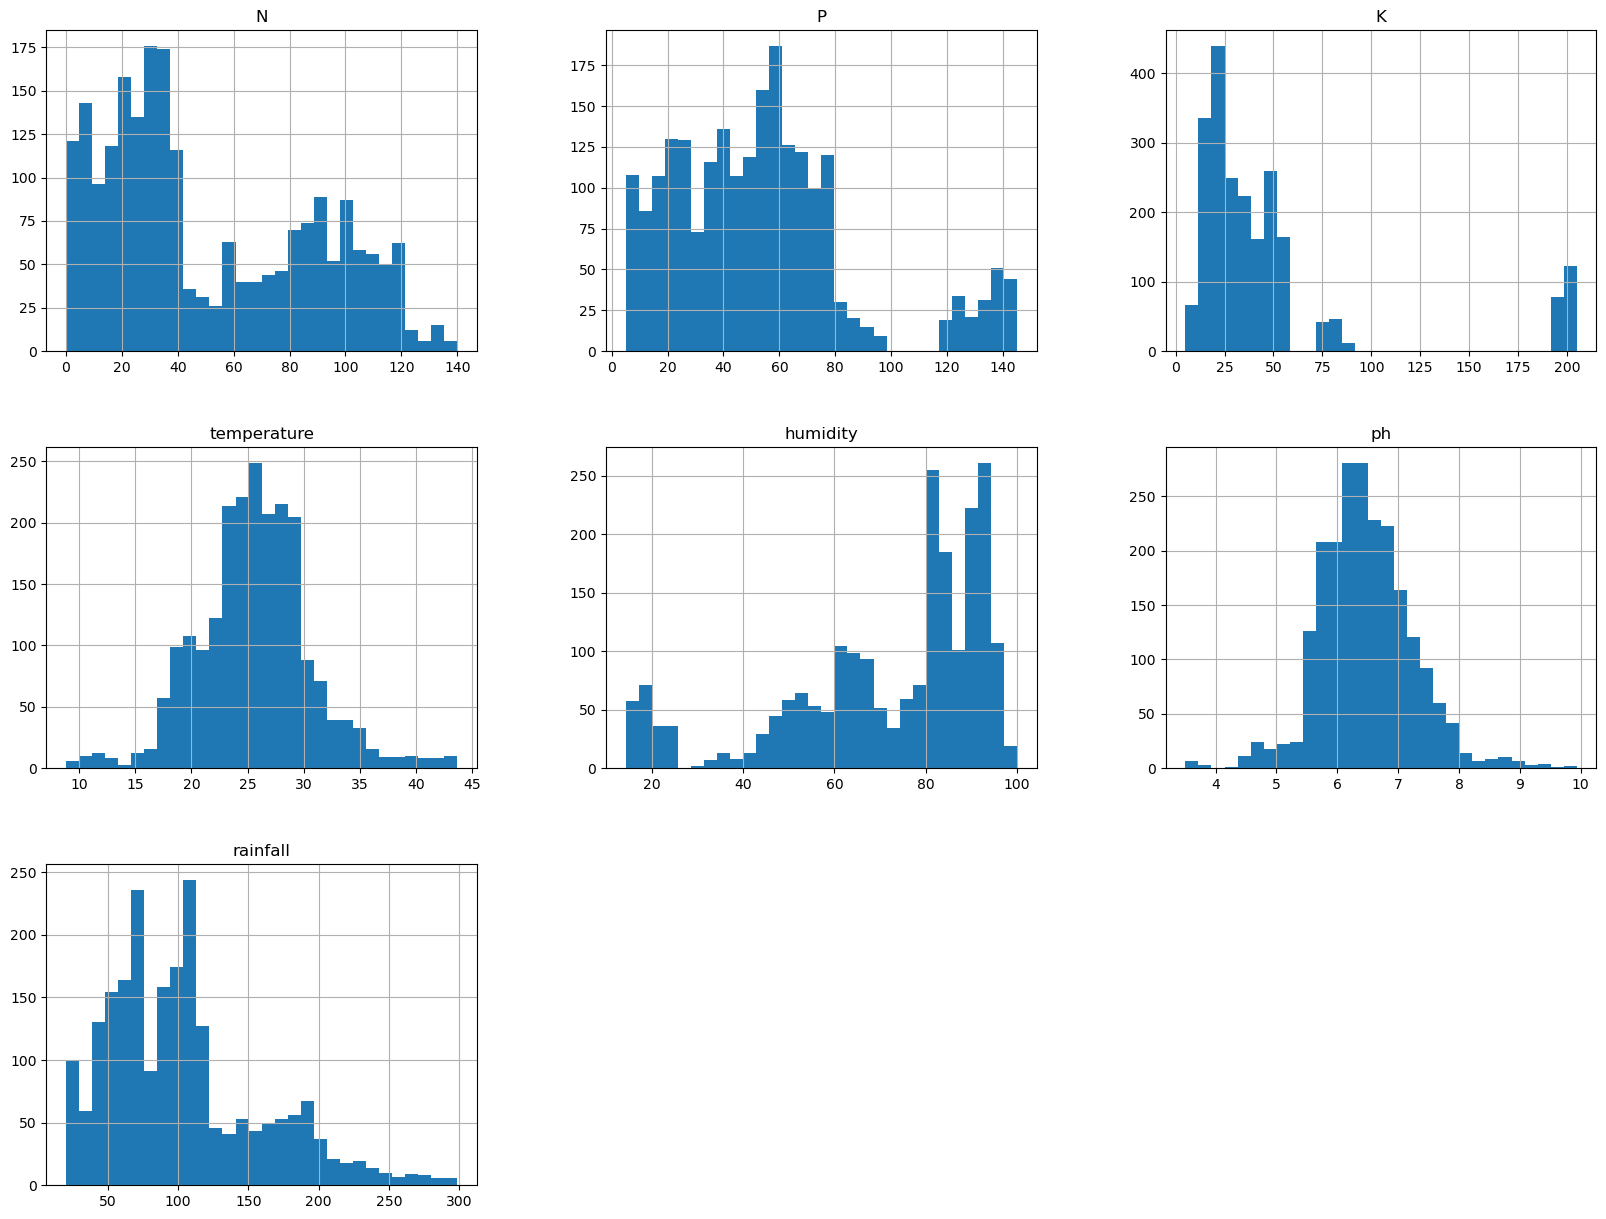

In [7]:
crop_data.hist(bins=30, figsize=(20,15))
plt.show()

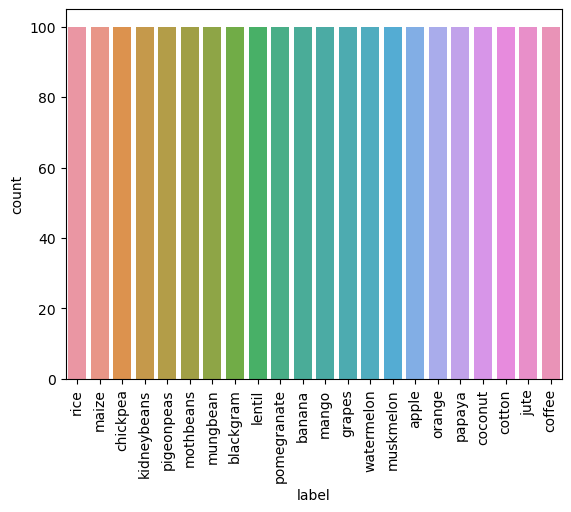

In [8]:
sns.countplot(x = 'label', data = crop_data)
plt.xticks(rotation=90)
plt.show()

In [9]:
crop_data.to_csv('crop_data.csv', index = False)
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
crop_data['label'] = le.fit_transform(crop_data['label'])  

In [11]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']  # Define feature columns
scaler = StandardScaler()
crop_data[features] = scaler.fit_transform(crop_data[features])  # Scale feature columns


In [12]:
X = crop_data.drop('label', axis=1)
y = crop_data['label']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state=52)

In [14]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print('Decision Tree Accuracy:', accuracy_score(y_test,y_pred_dt))
print('Classification Report:\n', classification_report(y_test,y_pred_dt))

Decision Tree Accuracy: 0.9795454545454545
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        17
           2       0.86      1.00      0.92        18
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        16
           8       0.89      0.96      0.92        25
           9       1.00      1.00      1.00        14
          10       1.00      0.79      0.88        19
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        21
          13       0.95      1.00      0.97        19
          14       0.96      1.00      0.98        22
          15       1.00      1.00      1.00        20
          16  

In [15]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

print('Random Forest Accuracy:', accuracy_score(y_test,y_pred_rf))
print('Classification Report:\n', classification_report(y_test,y_pred_rf))

Random Forest Accuracy: 0.990909090909091
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        16
           8       0.92      0.96      0.94        25
           9       1.00      1.00      1.00        14
          10       1.00      0.95      0.97        19
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        21
          13       0.95      1.00      0.97        19
          14       1.00      1.00      1.00        22
          15       1.00      1.00      1.00        20
          16   

In [16]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train,y_train)

y_pred_lr = lr_model.predict(X_test)

print('Logistic Regression Accuracy:', accuracy_score(y_test,y_pred_lr))
print('Classification Report:\n', classification_report(y_test,y_pred_lr))

Logistic Regression Accuracy: 0.9727272727272728
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        17
           2       0.94      0.94      0.94        18
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        16
           8       0.83      0.96      0.89        25
           9       1.00      1.00      1.00        14
          10       0.95      0.95      0.95        19
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        21
          13       0.95      1.00      0.97        19
          14       0.96      1.00      0.98        22
          15       1.00      1.00      1.00        20
        

In [17]:
# Inverse transform the labels back to original crop names
crop_data['label'] = le.inverse_transform(crop_data['label'])
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361,rice
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058,rice
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066,rice
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048,rice
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373,rice
